In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

In [3]:
train_data = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv', index_col = 0)

In [4]:
test_data = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')

In [5]:
train_data.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [6]:
train_data['Arrival Delay in Minutes'].median()

0.0

In [7]:
train_data[train_data.isnull().any(axis = 1)].shape[0]

28

In [8]:
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [10]:
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [12]:
numeric_features = train_data.select_dtypes(include=np.number).columns
correlation = train_data[numeric_features].corrwith(train_data['satisfaction']).abs().sort_values(ascending=False)

print(correlation)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64


In [13]:
train_data['Arrival Delay in Minutes'] = train_data['Arrival Delay in Minutes'].fillna(train_data['Arrival Delay in Minutes'].median())

In [14]:
train_data.shape

(10000, 23)

In [15]:
test_data.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [16]:
test_data['Arrival Delay in Minutes'] = test_data['Arrival Delay in Minutes'].fillna(test_data['Arrival Delay in Minutes'].median())
test_data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

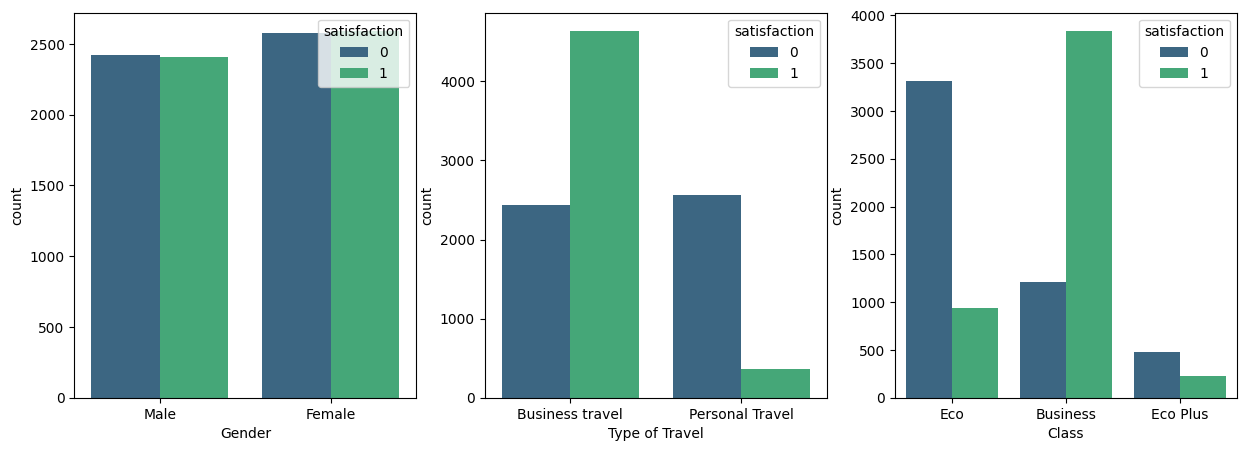

In [17]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=train_data, ax=axes[0])

sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=train_data, ax=axes[1])

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=train_data, ax=axes[2])

plt.show()

In [18]:
#train_data = pd.get_dummies(train_data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

In [19]:
#test_data = pd.get_dummies(test_data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

In [20]:
labelencoder = LabelEncoder()

train_data['Gender'] = labelencoder.fit_transform(train_data['Gender'].values)
train_data['Customer Type'] = labelencoder.fit_transform(train_data['Customer Type'].values)
train_data['Type of Travel'] = labelencoder.fit_transform(train_data['Type of Travel'].values)
train_data['Class'] = labelencoder.fit_transform(train_data['Class'].values)

test_data['Gender'] = labelencoder.fit_transform(test_data['Gender'].values)
test_data['Customer Type'] = labelencoder.fit_transform(test_data['Customer Type'].values)
test_data['Type of Travel'] = labelencoder.fit_transform(test_data['Type of Travel'].values)
test_data['Class'] = labelencoder.fit_transform(test_data['Class'].values)

In [21]:
train_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,1,1,33,0,1,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,0,0,49,0,0,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,0,0,43,0,1,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,0,0,27,0,0,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,1,0,11,1,1,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,54,1,1,1068,1,4,1,2,...,4,4,1,4,4,4,3,21,12.0,0
9997,0,0,54,0,2,1399,4,1,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9998,1,0,46,0,0,1440,3,3,2,3,...,4,4,4,4,3,4,3,37,38.0,1


In [22]:
X = train_data.drop('satisfaction', axis = 1)
y = train_data['satisfaction']

In [23]:
test_d = test_data.drop('id', axis = 1)

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
test_d = scaler.transform(test_d)

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
'''RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)'''

'RF_model = RandomForestClassifier()\nRF_model.fit(X_train, y_train)'

In [25]:
'''y_pred = RF_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")'''

'y_pred = RF_model.predict(X_test)\nroc_auc = roc_auc_score(y_test, y_pred)\nprint(f"ROC AUC Score: {roc_auc}")'

In [26]:
'''print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))'''

'print(classification_report(y_test, y_pred))\nprint("Model aniqligi:", accuracy_score(y_test,y_pred))'

In [29]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1002
           1       0.97      0.94      0.96       998

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

Model aniqligi: 0.9575


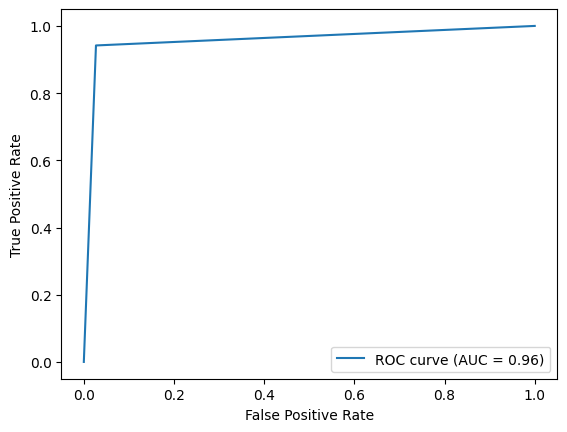

In [30]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [34]:
predictions = xgb_model.predict(test_d)
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [35]:
results = pd.DataFrame({'id': test_data['id'], 'satisfaction': predictions})
results.set_index('id', inplace=True)

In [36]:
results

,satisfaction
id,
1,0
2,1
3,1
4,1
5,1
...,...
3996,1
3997,0
3998,0


In [40]:
results.to_csv('submission.csv')

In [42]:
pd.read_csv('/kaggle/working/submission.csv', index_col = 0)

,satisfaction
id,
1,0
2,1
3,1
4,1
5,1
...,...
3996,1
3997,0
3998,0
